In [1]:
import socceraction
import socceraction.spadl as spadl

/Users/davidegualano/anaconda3/envs/Socceraction/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
import matplotlib
import pandas as pd
import numpy as np
import warnings
import urllib
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import RegularPolygon
from mplsoccer import Pitch, VerticalPitch, lines
from scipy.ndimage import gaussian_filter

In [3]:
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.filterwarnings(action="ignore", message="credentials were not supplied. open data access only")

In [4]:
fe = fm.FontEntry(
    fname='/Users/davidegualano/Documents/Python FTBLData/SourceSansPro-Regular.ttf',
    name='SourceSansPro-Regular'
)
fm.fontManager.ttflist.insert(0, fe)
matplotlib.rcParams['font.family'] = fe.name

In [5]:
xG = pd.read_csv("xGactions.csv", index_col = 0)
fb = pd.read_csv("teamsFOTMOB.csv", index_col = 0)

players0 = pd.read_csv("players2021.csv", index_col = 0)
players1 = pd.read_csv("players2122.csv", index_col = 0)
players2 = pd.read_csv("players2223.csv", index_col = 0)
players3 = pd.read_csv("players2324.csv", index_col = 0)

games0 = pd.read_csv("games2021.csv", index_col = 0)
games1 = pd.read_csv("games2122.csv", index_col = 0)
games2 = pd.read_csv("games2223.csv", index_col = 0)
games3 = pd.read_csv("games2324.csv", index_col = 0)

actions0 = pd.read_csv("actions2021.csv", index_col = 0)
actions1 = pd.read_csv("actions2122.csv", index_col = 0)
actions2 = pd.read_csv("actions2223.csv", index_col = 0)
actions3 = pd.read_csv("actions2324.csv", index_col = 0)

In [6]:
players = pd.concat([players0, players1, players2, players3])
games = pd.concat([games0, games1, games2, games3])
actions = pd.concat([actions0, actions1, actions2, actions3])

In [7]:
actions.drop(columns=['action_id'], inplace=True)
actions.reset_index(drop=True, inplace=True)
actions.reset_index(inplace=True)
actions.rename(columns={'index': 'action_id'}, inplace=True)

In [8]:
actions = spadl.add_names(actions)

In [9]:
df = (
    actions
    .merge(players, how="left")
    .merge(fb, how="left")
    .merge(xG, how="left")
)

In [10]:
df["beginning_distance"] = np.sqrt(np.square(105-df['start_x_a0']) + np.square(34-df['start_y_a0'])).round(2)
df["end_distance"] = np.sqrt(np.square(105-df['end_x_a0']) + np.square(34-df['end_y_a0'])).round(2)
df["length"] = df["end_distance"] - df["beginning_distance"]
df['length'] = df['length'].abs()
df["angle"] = np.arctan2(df["end_y_a0"] - df["start_y_a0"], df["end_x_a0"] - df["start_x_a0"])
df['angle_degrees'] = np.degrees(df['angle']) % 360

In [11]:
def format_season_id(season_id):
    # Convert to integer if it's a float
    season_id = int(season_id)
    # Extract the last two digits of the year
    start_year = str(season_id -1)[-2:]
    # Calculate the end year
    end_year = str(season_id)[-2:]
    # Format as 20/21
    formatted_season = f"{start_year}/{end_year}"
    return formatted_season

In [12]:
df.type_name.unique()

array(['pass', 'dribble', 'interception', 'throw_in', 'clearance',
       'take_on', 'tackle', 'corner_crossed', 'shot', 'freekick_crossed',
       'bad_touch', 'keeper_pick_up', 'foul', 'keeper_save', 'cross',
       'freekick_short', 'goalkick', 'keeper_claim', 'corner_short',
       'keeper_punch', 'shot_freekick', 'shot_penalty'], dtype=object)

In [13]:
df1 = df[df["type_name"].isin(["shot", "shot_freekick"])]

In [14]:
playerlist = df1['player_name'].unique().tolist()
cleaned_playerlist = [name for name in playerlist if pd.notna(name)]
cleaned_playerlist.sort()

In [15]:
from IPython.display import display, HTML

# Step 3: Generate the HTML dropdown
options_html = ''.join([f'<option value="{name}">{name}</option>' for name in cleaned_playerlist])

dropdown_html = f"""
<input list="players" id="dropdown" oninput="handleInput()" placeholder="Choose Someone">
<datalist id="players">
    {options_html}
</datalist>
<p id="output"></p>
<script>
function handleInput() {{
    var input = document.getElementById("dropdown").value;
    var output = document.getElementById("output");
    output.innerHTML = "Selected: " + input;
}}
</script>
"""

# Display the dropdown
display(HTML(dropdown_html))

In [16]:
df2 = df1[df1["player_name"] == 'Viktor Gyökeres']
pla = players[players["player_name"] == 'Viktor Gyökeres']
print(df2.team_name.unique())
print(pla.team_id.unique())

['Coventry' 'Swansea' 'Sporting']
[ 17 259 296]


In [17]:
df2a = df2[df2["team_name"] == "Sporting"]
plb = pla[pla["team_id"] == 296]
df2a.season_id.unique()

array([2324.])

In [18]:
# Apply the function to the 'season_id' column
df2a['formatted_season'] = df2a['season_id'].apply(format_season_id)

/var/folders/ns/3wxdg4g57h77vxwmr4wzmvt40000gn/T/ipykernel_36941/2406992386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2a['formatted_season'] = df2a['season_id'].apply(format_season_id)


In [19]:
df3 = df2a[df2a["season_id"].isin([2324.])]
pl = plb[plb["season_id"].isin([2324.])]

In [20]:
def convert_to_seconds(time_str):
    try:
        # Convert to string in case it's a float (e.g., NaN)
        time_str = str(time_str)
        # Split the time string into minutes and seconds
        minutes, seconds = map(int, time_str.split(':'))
        # Convert total time to seconds (minutes converted to seconds)
        return minutes * 60 + seconds
    except (ValueError, AttributeError):
        # Handle cases where the conversion fails (e.g., NaN or bad format)
        return 0  # or use `np.nan` if you prefer to mark as missing

# Apply the conversion function to the 'minutes_played' column
pl['seconds_played'] = pl['minutes_played'].apply(convert_to_seconds)

In [21]:
minutes = pl.groupby(["player_id", "player_name"])['seconds_played'].sum().reset_index(name='seconds_played')

In [22]:
# Function to convert total seconds to MM:SS format
def convert_to_mmss(seconds):
    if pd.isna(seconds) or seconds is None:
        return np.nan  # Return NaN if the input is None or NaN
    seconds = int(seconds)  # Ensure the input is an integer
    minutes = seconds // 60  # Calculate the minutes
    seconds = seconds % 60   # Calculate the remaining seconds
    return f"{minutes:02}:{seconds:02}"  # Format as MM:SS with leading zeros

# Apply the function to the 'duration_seconds' column to create a new column for the calculated minutes
minutes['calculated_min'] = minutes['seconds_played'].apply(convert_to_mmss)

In [23]:
df1shot = df3[df3["result_name"] == "fail"]
df1goal = df3[df3["result_name"] != "fail"]

In [24]:
nrows = df3.shape[0]
for y in range(nrows):
    title = df3['player_name'].iloc[y]

# Define the semicircle function
def semicircle(r, h, k):
    x0 = h - r  # x start
    x1 = h + r  # x finish
    x = np.linspace(x0, x1, 10000)  # many points to solve for y
    y = k - np.sqrt(r**2 - (x - h)**2)  # semicircle equation
    return x, y

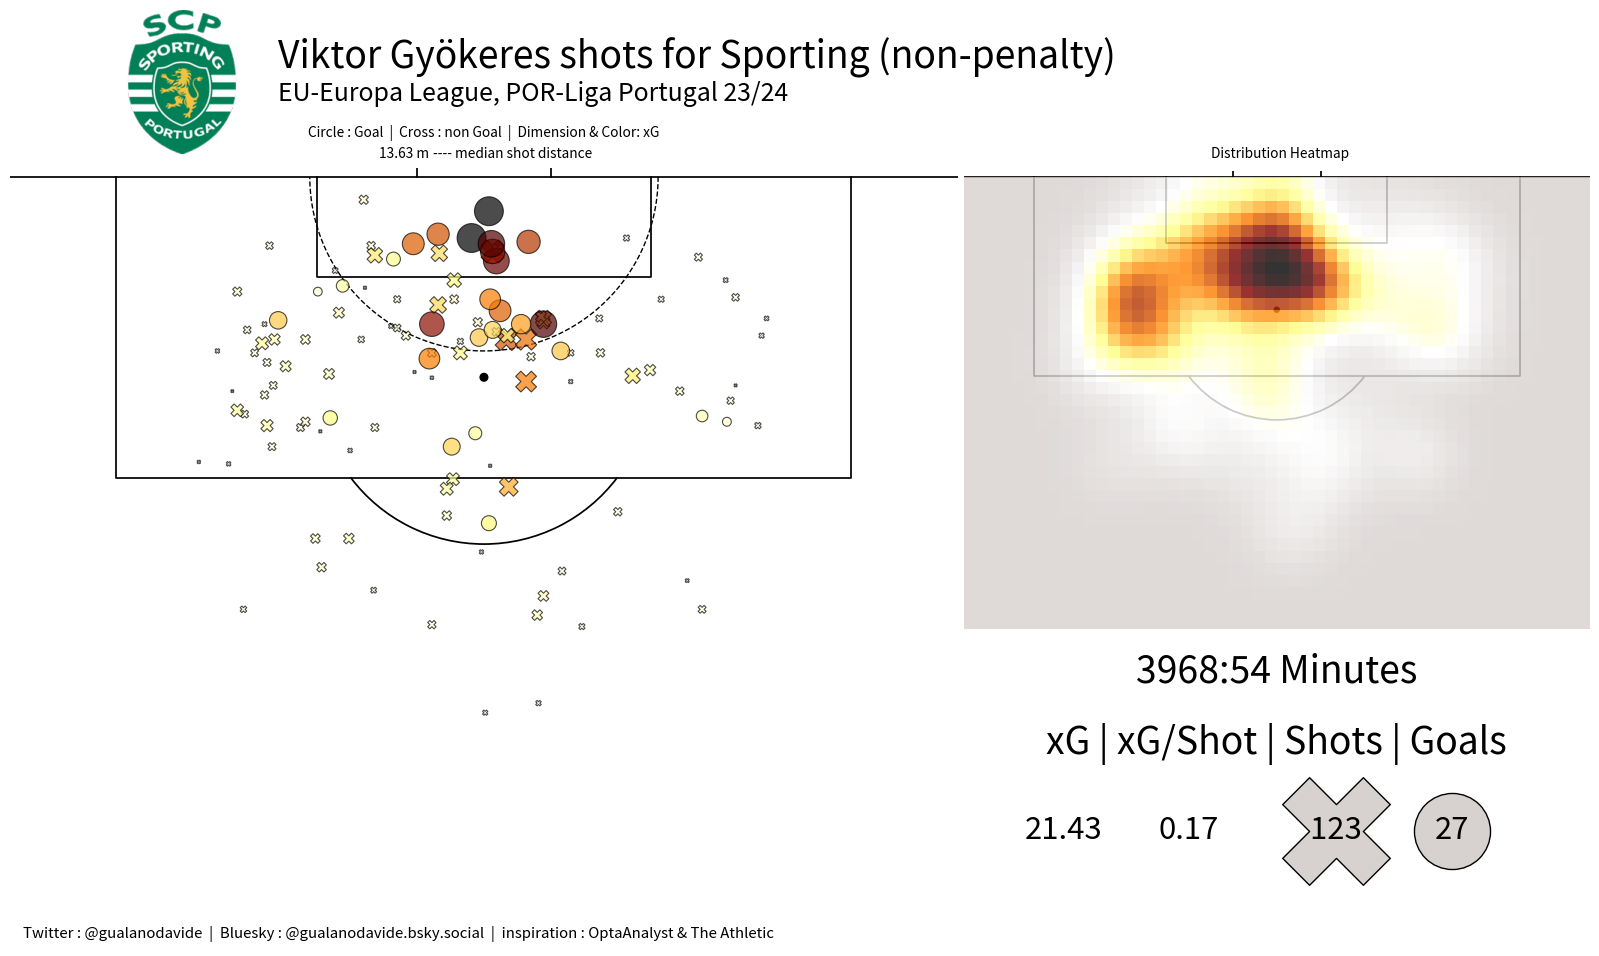

In [29]:
# Set up gridspec figure
fig = plt.figure(figsize=(16, 12), constrained_layout=True)
gs = fig.add_gridspec(3, 5, wspace=0.1, hspace=0.1)

# Create the axes
ax1 = fig.add_subplot(gs[:, :3]) 

ax2 = fig.add_subplot(gs[0:3, 3:]) 
pos2 = ax2.get_position() 
new_pos2 = [pos2.x0, pos2.y0 + 0.1, pos2.width + 0.09, pos2.height]  # Increase the 'bottom' value by 0.2
ax2.set_position(new_pos2)  # Apply the new position

ax3 = fig.add_subplot(gs[2:, 3:])
pos3 = ax3.get_position() 
new_pos3 = [pos3.x0, pos3.y0 + 0.03, pos3.width + 0.09, pos3.height]  # Increase the 'bottom' value by 0.2
ax3.set_position(new_pos3)


pitch = VerticalPitch(pitch_type='custom', pitch_width=68, pitch_length=105, half=True, pad_top=0.5, pad_bottom=-15, pad_left=-8,
                      pad_right=-8, goal_type='box', linewidth=1.25, line_color='#000000')

pitch.draw(ax=ax1)
pitch.draw(ax=ax2)

# Draw semicircle on both pitches
x_circle, y_circle = semicircle(105 - df3['start_x_a0'].median(), 34, 105)
ax1.plot(x_circle, y_circle, ls='--', color='#000000', lw=1, zorder=-1)

# Scatter plot for shots on both pitches
cmap0 = matplotlib.colormaps.get_cmap('afmhot_r')
combined_xG = pd.concat([df1shot.xG, df1goal.xG])
norm = plt.Normalize(combined_xG.min(), combined_xG.max())
pitch.scatter(df1shot.start_x_a0, df1shot.start_y_a0, s=(df1shot.xG * 500), cmap=cmap0, edgecolors='#000000', c=df1shot.xG, norm=norm,
               marker='X', alpha=0.7, lw=0.8, ax=ax1, zorder=1)
pitch.scatter(df1goal.start_x_a0, df1goal.start_y_a0, s=(df1goal.xG * 500), cmap=cmap0, edgecolors='#000000', c=df1goal.xG, norm=norm,
               marker='o', alpha=0.7, lw=0.8, ax=ax1)

# Define the colormap with #D7D1CF as the lowest value
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#D7D1CF', '#FFFFFF', '#FFFF80', '#FF8000', '#800000', '#000000'], N=256)
bin_statistic = pitch.bin_statistic(df3.start_x_a0, df3.start_y_a0, statistic='count', bins=(105, 68))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 2.5)
pcm = pitch.heatmap(bin_statistic, ax=ax2, cmap=cmap, alpha=0.8)

# Club logo and annotations
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{df3['fotmob_id'].iloc[0]}.png"))

# Add the club logos to the subplot 1
logo_ax1 = fig.add_axes([0.05, 0.8, 0.12, 0.12], zorder=1)  # Adjusted to fit subplot 1
logo_ax1.imshow(club_icon)
logo_ax1.axis("off")

# Titles for both subplots
title = df3['player_name'].iloc[0]
team_name = df3['team_name'].iloc[0]
competition_ids = ', '.join(df3['competition_id'].unique())
formatted_season = df3['formatted_season'].iloc[0]
season_id = df3['season_id'].iloc[0]
median_distance = df3['beginning_distance'].median()
converted_distance = round(median_distance, 2)

# Titles
ax1.text(0.5, 1.05, f"Circle : Goal  |  Cross : non Goal  |  Dimension & Color: xG", color=pitch.line_color,
        va='center', ha='center', fontsize=11, transform=ax1.transAxes)
ax1.text(0.53, 1.02, f"---- median shot distance", color=pitch.line_color,
        va='center', ha='center', fontsize=11, transform=ax1.transAxes)
ax1.text(0.416, 1.02, f"{converted_distance} m", color=pitch.line_color,
        va='center', ha='center', fontsize=11, transform=ax1.transAxes)

ax2.text(1.34, 1.02, f"Distribution Heatmap", color=pitch.line_color,
        va='center', ha='center', fontsize=11, transform=ax1.transAxes)

fig.text(0.17, 0.88, f'{title} shots for {team_name} (non-penalty)', fontsize=30, va='center', ha='left')
fig.text(0.17, 0.85, f'{competition_ids} {formatted_season}', fontsize=20, va='center', ha='left')
fig.text(0.48, 0.15, 'Twitter : @gualanodavide  |  Bluesky : @gualanodavide.bsky.social  |  inspiration : OptaAnalyst & The Athletic', va='center', ha='right', fontsize=12)

# Add content to ax3 (example: you can add more annotations or plots here)
ax3.text(0.5, 0.7, f"xG | xG/Shot | Shots | Goals", fontsize=30, va='center', ha='center')
ax3.text(0.16, 0.4, f"{(df3['xG'].sum()).round(2)}", fontsize=25, va='center', ha='center')
ax3.text(0.36, 0.4, f"{(df3['xG'].sum() / df3.shape[0]).round(2)}", fontsize=25, va='center', ha='center')
ax3.text(0.6, 0.4, f"{df3.shape[0]} ", fontsize=25, va='center', ha='center')
ax3.text(0.78, 0.4, f"{df3[df3['result_name'] == 'success'].shape[0]}", fontsize=25, va='center', ha='center')
ax3.scatter(0.595, 0.4, s=6000, edgecolors='#000000', c='#D7D1CF', marker='X', alpha=1, lw=1)
ax3.scatter(0.78, 0.4, s=3000, edgecolors='#000000', c='#D7D1CF', marker='o', alpha=1, lw=1)

ax3.text(0.5, 0.95, f"{', '.join(minutes['calculated_min'].unique())} Minutes", fontsize=30, va='center', ha='center')

ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.axis('off')

# Save the figure
plt.savefig(f'{title}-shotmap-{season_id}.png', dpi=500, facecolor="#D7D1CF", bbox_inches="tight", transparent=True)
plt.show()
